<img style="float: right;" src="img/column.png" width="250">

<figure>
    <a href="http://www.upm.es">
    <img style="float: right;" src="img/UPMLogo.png" width="100">
    </a>
</figure>

<b><font size="6">Chemical Processes</font></b>

<b><font size="6">Fractional distillation: McCabe-Thiele Method</font></b>

© **[Jorge Ramírez](http://blogs.upm.es/compsoftmatter/)**, **[Universidad Politécnica de Madrid](http://www.upm.es)**, 2020

# Introduction

In this unit we will review some basic concepts about vapor pressure and volatility of pure substances and **ideal binary mixtures**. Then, we will use that information to solve two distillation problems that appear frequently in Chemical Engineering:

- Flash distillation
- Fractional distillation

We begin by loading some of the libraries that we will use in this presentation. The codes inside the `destilacion.py` file have been written specifically for this exercise. You can inspect the contents of the file to see the implementation details.

Execute the following code to load the necessary libraries (select the cell and press `Shift + Enter`).

In [1]:
from destilacion_ENGLISH import *

# Vapor Pressure of Pure Substances: Antoine's Equation

The Antoine equation is a semi-empirical correlation describing the dependence of vapor pressure on temperature for pure liquids. It is given by the expression:

\begin{equation}
\log_{10} p^0=A-\frac{B}{C+T}
\label{eq:Antoine}
\end{equation}

Where $A$, $B$ and $C$ have constant values that depend on the substance under consideration. Typically, the Antoine equation is defined for a certain temperature interval $[T_1, T_2]$ and it is important not to go outside this interval. In this presentation, we will disregard such validity intervals.

In this exercise, we have taken from the data base **[DDBST](http://ddbonline.ddbst.com/AntoineCalculation/AntoineCalculationCGI.exe)** the values of the constants of the Antoine equation for a number of substances..

Next, we compare how the vapor pressure of two chosen substances varies with respect to temperature. Run the following code and modify the substances in the two drop-down lists to compare their respective volatilities as a function of temperature. Note how the relative volatilities between two different liquids can be related to their chemical structure and the predominant intermolecular interactions in each substance.

In [2]:
display(VBox([controlsvolatility, outputvolatility]))

# Boiling point of pure liquids

From the **vapor pressure**, the **boiling temperature** of a pure fluid can be determined as the temperature $T$ at which its vapor pressure becomes equal to the external pressure. We can find such a solution by solving Antoine's equation \eqref{eq:Antoine}, using Python's **fsolve** function). Depending on the volatility of each substance, the change in outside pressure will affect the boiling point to a greater or lesser extent.

Run the following code to calculate the boiling point of any of the liquids in our library. Note how pressure changes affect each of the fluids differently.


In [3]:
display(VBox([controlsTeb, outputTeb]))

We can also compare, graphically, the boiling temperatures of two different fluids as a function of the external pressure (in atmospheres):

In [4]:
display(VBox([controlsTeb2, outputTeb2]))

# Ideal binary mixtures: Raoult's law and P-x diagram

**Raoult's law** assumes that, in an **ideal mixture** of two liquids, the vapor pressure of each of the components of the mixture is **proportional** to its **mole fraction** within the solution:

\begin{equation}
p_i = p_i^0 x_i
\label{eq:Raoult}
\end{equation}

Using this definition, we can represent the vapor pressure of a binary mixture of two substances A and B. Run the following code to explore how the vapor pressure of an ideal mixture of two of the pure liquids in our library would behave.

**NOTE**: Note how, in ideal mixtures of Ethanol and Acetone or Ethanol and Acetonitrile, the relative volatility of the two liquids reverses as the temperature changes.

**NOTE:** In reality, mixtures are often not ideal and often exhibit deviations from Raoult's law. **In this exercise, we will consider all mixtures to be ideal**. Therefore, some diagrams (e.g. the Water-Ethanol diagram) will not show singular points as azeotropes.

In [5]:
display(VBox([controlsRaoult, outputRaoult]))

# T-xy Diagrams: Flash Distillation

<img style="float: right;" src="img/Vap-Liq_Separator.png" width="200">

**Flash distillation** is a **unitary operation** in which a **saturated liquid mixture** is introduced into a tank at **lower pressure**, where it separates into two phases, a vapor enriched in the most volatile component and a liquid enriched in the least volatile component. The pressure $p$ and temperature $T$ inside the tank must be carefully chosen to optimize the separation.

The boiling point of the binary liquid mixture will be the temperature at which the vapor pressure of the mixture becomes equal to the external pressure.

\begin{equation}
p_{ext} = p_A^0(T)x_A + p_B^0(T)(1-x_A)
\label{eq:pext_p0}
\end{equation}

If we know the temperature $T$, we can determine the composition of the mixture that will have that boiling temperature. By subtracting $x_A$ from the equation \eqref{eq:pext_p0}:
\begin{equation}
x_A = \frac{p_{ext}-p_B^0(T)}{p_A^0(T)-p_B^0(T)},
\label{eq:x_A_pext_p0}
\end{equation}
as well as the composition of the vapor at that temperature (using **Dalton's law**):

\begin{equation}
y_A = \frac{x_A p_A^0(T)}{p_{ext}}.
\label{eq:Dalton}
\end{equation}

First, let's explore what form the **T-xy** (temperature-liquid and vapor composition) diagrams have for ideal fluid mixtures, as a function of the pressure $p$ inside the distiller and the composition of the mixture.

Run the following code and observe how the **T-xy** diagram changes as a function of the relative volatility of the two components of the mixture. Also note how the liquid-vapor coexistence zone (the area enclosed between the L and V curves) changes as the pressure $p$ changes.

**NOTE**: In **T-xy** diagrams, the common practice is to select Fluid A (the fluid with respect to which the mole fraction is shown on the x-axis) as the more volatile of the two fluids in the mixture.

In [6]:
display(VBox([controlsTx, outputTx]))

With that information, let's try to **solve a Flash distillation problem** in which we know:

- The two fluids A and B (we will try to select A as the most volatile).
- The composition $x_F$ (mole fraction) and flow rate $F$ (mol/s) of the mixture fed to the distiller.
- The temperature $T$ (ºC) and pressure $p$ (atm) inside the distiller.

Run the following code and explore how the compositions of the head and bottom streams, as well as the dew and bubble temperatures, vary as the feed conditions and the pressure at which the column is operating change. For each pair of substances, $p$, $T_F$ and/or $x_F$ can be modified so that the inlet mixture is at coexistence conditions (the zone between the L and V curves) inside the distiller.

In [7]:
display(VBox([controlsFlash, outputFlash]))

<img style="float: right;" src="img/column.png" width="250">

# y-x diagrams: Fractional Distillation

Flash distillation does not allow the complete separation of the components of an ideal mixture. For this, it is necessary to make use of fractional distillation.

In this type of operation, it is more practical to work with the **y-x** diagram (vapor composition versus liquid composition, with respect to the most volatile component).

We can explore what these **y-x** diagrams look like for pairs of fluids from our library (select the **most volatile** fluid as **FluidA**), as a function of the pressure at which the column is operating.

Run the following code and explore how the **y-x** diagram as a function of the selected fluid pair and the pressure at which the column is working.

**NOTE**: Please select the most volatile fluid as Fluid A. The selection is correct when the coexistence curve is above the main diagonal of the diagram.

**NOTE**: Note how the relative volatility between Ethanol and Acetonitrile is reversed at low pressures.

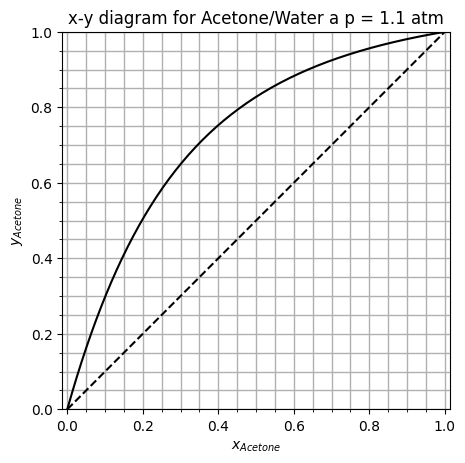

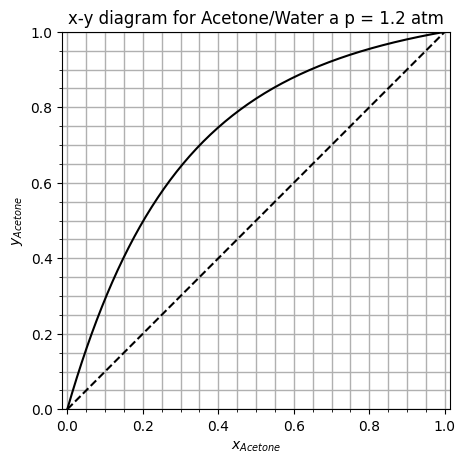

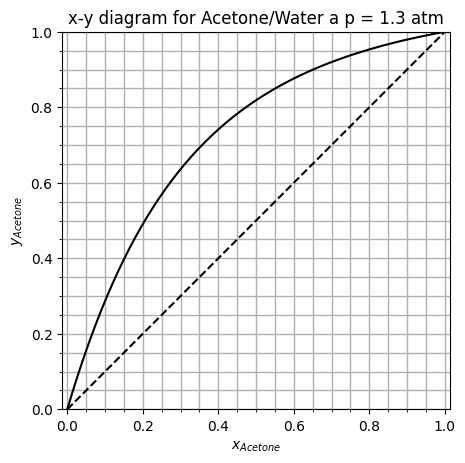

In [8]:
display(VBox([controlsyx, outputyx]))

# Fractional distillation: McCabe and Thiele method

It is desired to separate the components of an ideal binary mixture of composition $x_F$ (in the most volatile component) into two streams, one enriched in the most volatile component ($x_D$) and one impoverished (of composition $x_B$).
The McCabe and Thiele method is a graphical method that allows us to design and size fractional distillation operations in a simple, intuitive and instructive way. The method requires that we draw three straight lines in the **y-x** diagram:

- The **feed line**: it passes through the point $(x_F, x_F)$ and the slope depends on the state in which the feed enters the column (such as saturated liquid, subcooled liquid, saturated vapor, etc).

- The **rectification zone operating line**: it passes through the point $(x_D, x_D)$ and gives the ratio between the compositions of the liquid descending from an upper plate and that of the vapor ascending from a lower plate, in the column zone above the feed.

- The **depletion zone operating line**: it passes through the point $(x_B, x_B)$, the same as above but for the column zone below the feed.

Next, we will explore how the McCabe-Thiele diagram is constructed step by step, focusing on a mixture of acetic acid and isopropyl alcohol and assuming that the column works at a pressure of 2 atm.

## Plotting the feed line

To plot the feed line, or $q$ line, we need to know the $T_{bubble}$, $T_{dew}$, $C_p$(L) and $C_p$(V) of each pure fluid and $\Delta H_{vap}$ of each pure fluid. These values are already determined for the fluids in our library. As discussed above, the feed straight line passes through the point $(x_F, x_F)$ and its slope depends on the state in which the feed enters the column. Details on how the $q$ line is calculated can be found in the document uploaded to the Moodle platform.

In the following application, it can be observed how, for a mixture of acetic acid and isopropyl alcohol, the straight line $q$ in the **y-x** diagram changes as a function of the feed composition and the feed temperature. Simultaneously, one can observe in the **T-xy** diagram the thermal condition of the feed and place it with respect to the Liquid-Vapor coexistence curves for the same mixture. Note how:

- When the feed is subcooled (point $x_F$, $T_F$ below the liquid-vapor coexistence zone in the **T-xy** diagram), the feed straight line has a positive slope.

- When the feed enters the bubble point (point $x_F$, $T_F$ on the liquid curve in the **T-xy** diagram), the feed straight line is vertical (slope $\infty$).

- When the feed enters as a vapor-liquid mixture (point $x_F$, $T_F$ within the vapor-liquid coexistence zone in the **T-xy** diagram), the straight line $q$ has negative slope. Moreover, in this particular case, the straight line $q$ can be determined by joining the point $(x_F,x_F)$ with the point $(x, y)$, with $x$ and $y$ being the compositions of the liquid and vapor, respectively, in equilibrium with the feed. The compositions $x$ and $y$ can be extracted from the **T-xy** diagram.

- When the feed enters the dew point (point $x_F$, $T_F$ on the steam curve in the **T-xy** diagram), the feed line is horizontal (slope 0).

- When the feed enters superheated (point $x_F$, $T_F$ above the liquid-vapor coexistence zone in the **T-xy** diagram), the feed straight line has again a positive slope.

In [10]:
display(VBox([controlsFeed, outputFeed]))

## Draw the operating line of the rectification zone.

Once the feed line has been drawn, we can construct the operating line of the rectification zone, which passes through the point $(x_D, x_D)$. This line can be constructed in two ways:

- with the slope $\frac{R_{ext}}{1+R_{ext}}$

- with the intersection point $\left( 0, \frac{x_D}{1+R_{ext}}\right)$.

The external reflux ratio $R_{ext} \ge 0$ determines the slope. The minimum value of $R_{ext}$ is determined by the intersection point of the feed line and the equilibrium curve, as can be seen in the application below.

In the following example, observe how they are modified:

- the feed line by varying the feed conditions $(x_F, T_F)$;

- the operating line of the rectification zone by changing the distillate composition specification $x_D$ and the external reflux ratio $R_{ext}$.

- the minimum reflux condition $R_{ext,min}$ by modifying $x_F, T_F$ and $x_D$.

Note also how it is necessary for $R_{ext}$ to be greater than the minimum reflux ratio $R_{ext, min}$ for distillation to be possible.

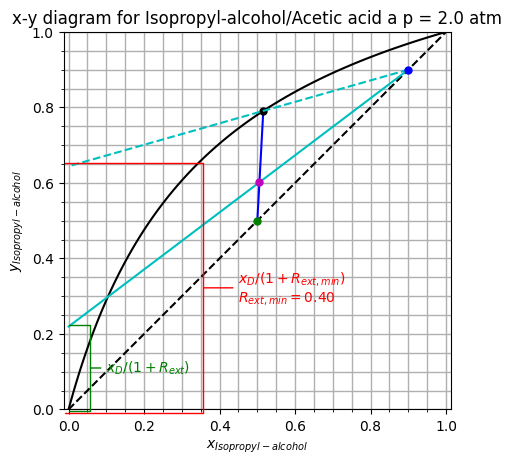

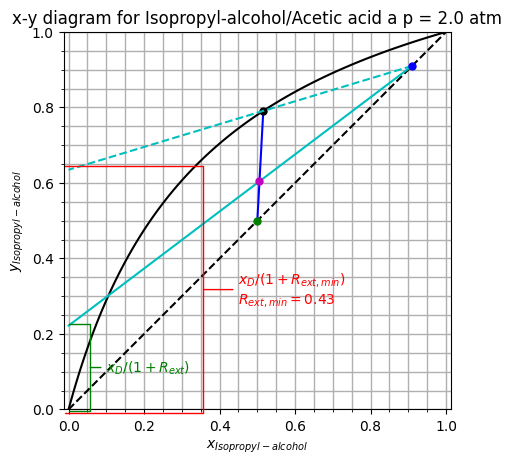

In [11]:
display(VBox([controlsFeedRectif, outputFeedRectif]))

## Plot the operating line of the depletion zone.

Once the feed line $q$ and the operating line in the rectification zone (let's call it $R_1$) have been drawn, drawing the operating line of the depletion zone is very simple. It is a matter of joining the point $(x_B, x_B)$ with the point of intersection between the straight lines $q$ and $R_1$.

In the following example, all the necessary lines are plotted in order to develop the McCabe-Thiele method as a function of the parameters $x_F$, $x_B$, $x_D$, $T_F$ and $R_{ext}$, for the mixture of acetic acid and isopropyl alcohol at a pressure of 2 atm. Note how, when the reflux is less than the minimum allowed, the operating lines are shown in red, which means that the distillation cannot be carried out.

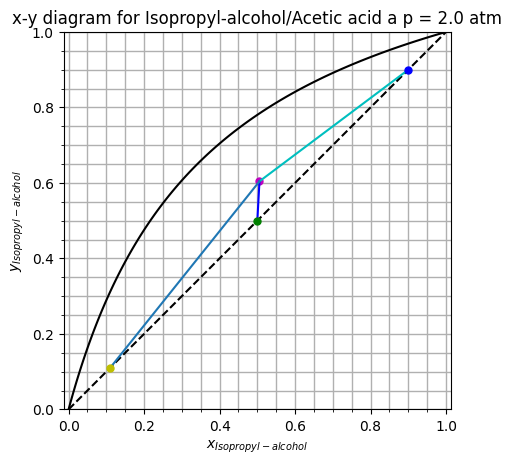

In [12]:
display(VBox([controlsAllLines, outputAllLines]))

## McCabe-Thiele method step by step

Once all the necessary straight lines have been drawn, we proceed to determine the number of equilibrium stages necessary to carry out the fractional distillation according to the specification. To do so, we start from the point $(x_D, x_D)$ and draw straight steps that alternatively rest on the vapor-liquid equilibrium curve and on the operating line of the rectification or depletion zone, as appropriate.

In the following example, the problem can be solved step by step:

- Select some conditions of the input mixture in column $x_F$ and $T_F$.
- Select a specification for the outlet streams $x_B$ and $x_D$.
- Select an external reflux ratio $R_{ext}$ greater than the minimum ratio set by the problem conditions (if this condition is not met, distillation cannot be carried out).
- Increase the number of steps progressively and observe how the McCabe-Thiele diagram is built up step by step.
- When the number of steps is sufficient to complete the desired distillation, the solution will be displayed on the graph. Increasing the number of steps above the required number of equilibrium stages does not affect the solution.

In [13]:
display(VBox([controlsMcCabeStep, outputMcCabeStep]))

## Exploring the McCabe-Thiele Method

Having understood how the various variables and the specification affect the solution of a fractional distillation problem, we can explore how the different distillation parameters affect the number of stages required to carry out the distillation. To do this, we need to select:

- Fluids we want to separate (select **FluidA** as the **most volatile** of the two).
- Operation specification (feed composition $x_F$, distillate stream composition $x_D$ and bottom stream composition $x_B$).
- External reflux ratio $R_{ext}$ to be used.
- Temperature at which the feed enters ($T_F$).
- Pressure at which the column operates ($p$).

Run the following code and play with the variables to see how the distillation column conditions vary.

**NOTE: Due to the mathematical complexity of some cases, it is possible that the application may crash. In that case, it is advisable to restart the Python interpreter and rerun everything. To do this, select the `Kernel/Restart & Run All` option from the menu.

**NOTE: Explore the following two extreme cases:

- Ethanol + isopropyl-alcohol mixture, $p$=0.1 atm, $T_F$=145 °C, $x_F$=0.64, $x_B$=0.01, $x_D$=0.92, $R_{ext}$=5. The distillation is very complicated, due to the very similar volatility between the two fluids under these conditions, and the distillation requires more than 150 ideal stages.

- Isopropyl-alcohol + Phenol mixture, $p$=0.1 atm, $T_F$=60 °C, $x_F$=0.6, $x_B$=0.13, $x_D$=0.88, $R_{ext}$=0.2. The distillation is very easy, due to the large difference in volatility between the two fluids under these conditions, and the distillation requires only 1 ideal stage.

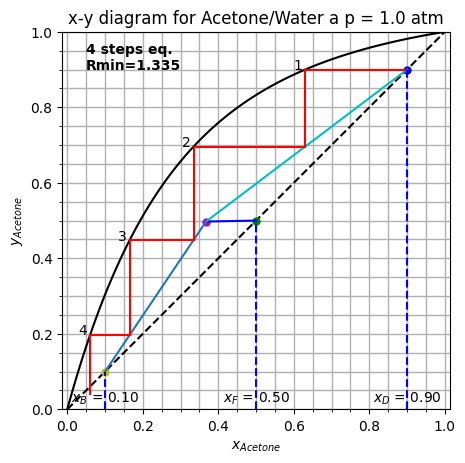

In [14]:
display(VBox([controlsMcCabe, outputMcCabe]))

# Bibliography - Other Resources

- W.L. McCabe, J.C. Smith y P. Harriott, *Operaciones Unitarias en Ingeniería Química*, 7ª ed., McGraw Hill, 2007
- J. Kantor, *[Introduction to Chemical Engineering Analysis](https://github.com/jckantor/CBE20255)*, curso CBE 20255, Universidad de Notre Dame, Indiana, EE.UU.
- [LearnChemE](http://www.learncheme.com/simulations)